In [1]:
#Data manipulation
import pandas as pd

# Plotting
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('Source/export-token-0x2d94aa3e47d9d5024503ca8491fce9a2fb4da198.csv', index_col=0)

# Drop rows with no information
df.dropna(how='all', inplace=True)

In [3]:
df.head()

,Blockno,UnixTimestamp,DateTime,From,To,Quantity,Standard Deviation
Txhash,,,,,,,
0xb795556b86ad687da4c571c19d5c46f87cf668b200ef3b8f82f150c8448a4306,12369440.0,1.620154e+09,5/4/2021 18:48,0xea8e151e30bf690d446da31ee5d8b4811046c94b,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,35000.000000,19329.74930
0xb6668fac94abdbcc19d63a73d5aa296166133c6f587394cb535303740f271512,12369440.0,1.620154e+09,5/4/2021 18:48,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0xf716ef29c5599d7fc982371d96714a0ead545691,0.000000,-45093.78499
0xc2360fba8a1217e33021380c8326a161cffc8c09317e45bd5b14b8094dba7325,12369440.0,1.620154e+09,5/4/2021 18:48,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x27f9adb26d532a41d97e00206114e429ad58c679,17473.710570,335.85734
0xc2360fba8a1217e33021380c8326a161cffc8c09317e45bd5b14b8094dba7325,12369440.0,1.620154e+09,5/4/2021 18:48,0x27f9adb26d532a41d97e00206114e429ad58c679,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0.000000,18827.80001
0x6d09c1f696fd4e82f1fe0e0350379459a9da1005603a8f6ed2d1ea8091a65ca9,12369441.0,1.620154e+09,5/4/2021 18:48,0x170ae47ba9b913c33f038aa011b5b83935e86091,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,9878.437491,29450.96147


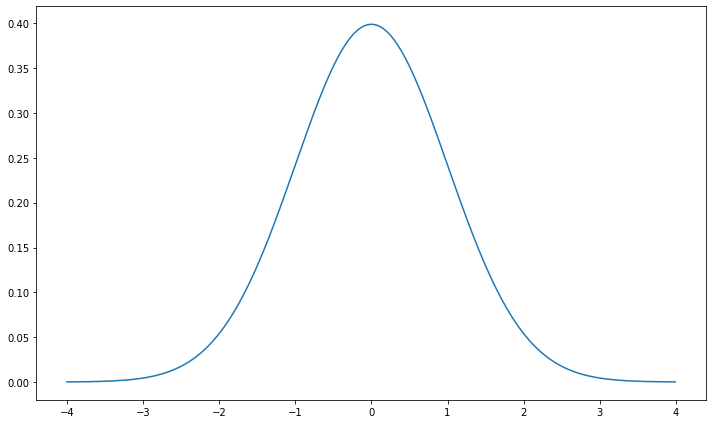

In [4]:
# Plot PDF of normal distribution
x = []
bell_curve = []
for i in np.arange(-4,4,0.01):
    bell_curve.append(norm.pdf(i))
    x.append(i)
    
plt.subplots(figsize=(10,6))
sns.lineplot(x=x, y=bell_curve)
plt.tight_layout()
plt.savefig(fname='normal_dist_2', dpi=150)
plt.show()

In [5]:
# token metrics
print('Mean',df['Quantity'].mean())
print('STDEVS',df['Quantity'].std())

Mean 21258.918903911355
STDEVS 35991.47722558263


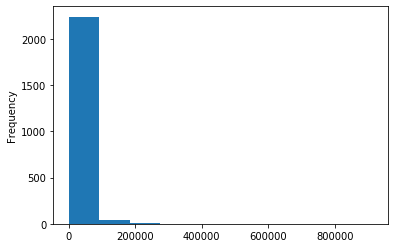

In [6]:
df = df.groupby(['Txhash','From', 'To'])['Quantity'].sum().reset_index()

df['Quantity'].plot(kind='hist')

In [7]:
df['Quantity'].describe()

count      2296.000000
mean      21268.178015
std       35996.645858
min           0.000000
25%        6272.274886
50%       12770.798860
75%       26471.832210
max      914926.922200
Name: Quantity, dtype: float64

In [8]:
pd.qcut(df['Quantity'], q=7)

0       (37422.037, 914926.922]
1          (3949.398, 7121.576]
2          (10000.0, 15722.198]
3        (23291.463, 37422.037]
4          (10000.0, 15722.198]
5        (15722.198, 23291.463]
6            (-0.001, 3949.398]
7            (-0.001, 3949.398]
8       (37422.037, 914926.922]
9          (3949.398, 7121.576]
10       (15722.198, 23291.463]
11         (3949.398, 7121.576]
12           (-0.001, 3949.398]
13       (15722.198, 23291.463]
14       (23291.463, 37422.037]
15          (7121.576, 10000.0]
16       (23291.463, 37422.037]
17         (3949.398, 7121.576]
18           (-0.001, 3949.398]
19          (7121.576, 10000.0]
20         (3949.398, 7121.576]
21          (7121.576, 10000.0]
22      (37422.037, 914926.922]
23          (7121.576, 10000.0]
24          (7121.576, 10000.0]
25       (23291.463, 37422.037]
26           (-0.001, 3949.398]
27         (3949.398, 7121.576]
28         (3949.398, 7121.576]
29          (7121.576, 10000.0]
                 ...           
2266    

In [9]:
df['quantile_ex_1'] = pd.qcut(df['Quantity'], q=7)
df['quantile_ex_2'] = pd.qcut(df['Quantity'], q=10, precision=0)

df.head()

,Txhash,From,To,Quantity,quantile_ex_1,quantile_ex_2
0,0x001684ea6bf3aed4ee7bfc27666d9176d3edeb1c2684...,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x000000005736775feb0c8568e7dee77222a26880,89468.86465,"(37422.037, 914926.922]","(42140.0, 914927.0]"
1,0x0028329f6ae008805bab802abb5adf292e0cc8674be3...,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x62ed54b8bfb15d1131275473095044cdfaf80355,6969.00000,"(3949.398, 7121.576]","(5044.0, 7512.0]"
2,0x0041719fd3491195971a80ffd6e308c1cec7b75a3c52...,0x358c84faa7f860ab41b93edccb7e64f7eb330bb1,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,12000.00000,"(10000.0, 15722.198]","(10000.0, 12771.0]"
3,0x0041fe3752c0ce03b4ca998b8f5b37548013838ac828...,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x78cce34b82f8cef05eb658ddcf10f9a154298ed4,33217.93869,"(23291.463, 37422.037]","(31343.0, 42140.0]"
4,0x0055cea5f0be9fc35f50abac2cacd770bb3d97f63831...,0x4124dd173b3c9e7b7389bba75708ef0b72babf85,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,12422.00000,"(10000.0, 15722.198]","(10000.0, 12771.0]"


In [10]:
df['quantile_ex_1'].value_counts()

(23291.463, 37422.037]     365
(7121.576, 10000.0]        358
(-0.001, 3949.398]         338
(15722.198, 23291.463]     328
(3949.398, 7121.576]       319
(10000.0, 15722.198]       297
(37422.037, 914926.922]    291
Name: quantile_ex_1, dtype: int64

In [11]:
df['quantile_ex_2'].value_counts()

(7512.0, 10000.0]      326
(12771.0, 17422.0]     232
(42140.0, 914927.0]    230
(2915.0, 5044.0]       230
(-1.0, 2915.0]         230
(31343.0, 42140.0]     229
(22392.0, 31343.0]     229
(5044.0, 7512.0]       229
(17422.0, 22392.0]     228
(10000.0, 12771.0]     133
Name: quantile_ex_2, dtype: int64

In [12]:
bin_labels_5 = ['BANK HODL_1', 'BANK HODL_2', 'BANK HODL_3', 'BANK HODL_4', 'BANK HODL_5']
df['quantile_ex_3'] = pd.qcut(df['Quantity'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,Txhash,From,To,Quantity,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,0x001684ea6bf3aed4ee7bfc27666d9176d3edeb1c2684...,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x000000005736775feb0c8568e7dee77222a26880,89468.86465,"(37422.037, 914926.922]","(42140.0, 914927.0]",BANK HODL_5
1,0x0028329f6ae008805bab802abb5adf292e0cc8674be3...,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x62ed54b8bfb15d1131275473095044cdfaf80355,6969.00000,"(3949.398, 7121.576]","(5044.0, 7512.0]",BANK HODL_2
2,0x0041719fd3491195971a80ffd6e308c1cec7b75a3c52...,0x358c84faa7f860ab41b93edccb7e64f7eb330bb1,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,12000.00000,"(10000.0, 15722.198]","(10000.0, 12771.0]",BANK HODL_3
3,0x0041fe3752c0ce03b4ca998b8f5b37548013838ac828...,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,0x78cce34b82f8cef05eb658ddcf10f9a154298ed4,33217.93869,"(23291.463, 37422.037]","(31343.0, 42140.0]",BANK HODL_5
4,0x0055cea5f0be9fc35f50abac2cacd770bb3d97f63831...,0x4124dd173b3c9e7b7389bba75708ef0b72babf85,0x59c1349bc6f28a427e78ddb6130ec669c2f39b48,12422.00000,"(10000.0, 15722.198]","(10000.0, 12771.0]",BANK HODL_3


In [17]:
df['quantile_ex_3'].value_counts()

BANK HODL_2    555
BANK HODL_1    460
BANK HODL_5    459
BANK HODL_4    457
BANK HODL_3    365
Name: quantile_ex_3, dtype: int64